In [1]:
import sys
sys.path.append("..")

import helper as hlp
import pandas as pd

[nltk_data] Downloading package stopwords to C:\Users\Abdul
[nltk_data]     Manaf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
EPOCHS = 50
MAX_LEN = 30
N_CLASSES = 2
BATCH_SIZE = 64
LEARNING_RATE = 2e-5
NAME = 'xlm(roberta)-urdu'
MODEL_NAME = 'xlm-roberta-base'

# dir = '/content/drive/MyDrive/Hate Speech_Multilingual /Code/Dataset Statistics/dataset'
dir = '../../../Dataset Statistics/dataset'

# path = f'/content/drive/MyDrive/Hate Speech_Multilingual /Code/Model training/saved_models/{NAME}'
path = f'../saved_models/{NAME}'

In [3]:
train_df = pd.read_csv(f'{dir}/train.csv')
val_df = pd.read_csv(f'{dir}/val.csv')
test_df = pd.read_csv(f'{dir}/test.csv')

train_texts = train_df['urdu_text'].values
val_texts = val_df['urdu_text'].values
test_texts = test_df['urdu_text'].values

train_labels = train_df['class'].values
val_labels = val_df['class'].values
test_labels = test_df['class'].values

In [4]:
#show 5 values along with their labels
for i in range(5):
    print(train_texts[i], train_labels[i])

مجھے دوستوں اور عزیزوں کے خاندانوں کے لئے مجھے موت اور زخمیوں میں زخمی کر دیا گیا 0
اس ہفتے ہمارے نئے گھر میں منتقل ہونے کا انتظار نہیں کر سکتے اس ہفتے کے آخر میں اور ہفتے میں ایک ہفتے میں  لطف اندوز ہونے کے لئے  مسلمان VPN پی این آئی پی پی پی PPP VPN 0
اِس ویب سائٹس کے بارے میں کیا کہا جا سکتا ہے کہ... 0
مُلک سے گزرنے والے راستے پر #ہم @m @m, @m_m, @m 0
برائے مہربانی.آپ کے پیچھے چلیں. %d 0


In [5]:
#show 5 values along with their labels
for i in range(5):
    print(hlp.preprocess_text(train_texts[i], language="urdu")
    , train_labels[i])

مجھے دوستوں عزیزوں خاندانوں مجھے موت زخمیوں میں زخمی کر دیا گیا 0
اس ہفتے ہمارے نئے گھر میں منتقل ہونے کا انتظار نہیں کر سکتے اس ہفتے میں ہفتے میں ہفتے میں لطف اندوز ہونے مسلمان vpn پی این پی پی پی ppp vpn 0
اِس ویب سائٹس بارے میں کیا کہا جا سکتا 0
مُلک سے گزرنے راستے m m mm m 0
برائے مہربانیآپ پیچھے d 0


In [6]:
## apply preprocessing to all texts
train_texts = [hlp.preprocess_text(text, language="urdu") for text in train_texts]
val_texts = [hlp.preprocess_text(text, language="urdu") for text in val_texts]
test_texts = [hlp.preprocess_text(text, language="urdu") for text in test_texts]

In [7]:
## mbert model and tokenizer
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

from transformers import XLMRobertaTokenizer, XLMRobertaForSequenceClassification

tokenizer = XLMRobertaTokenizer.from_pretrained(MODEL_NAME)
model = XLMRobertaForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=2)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

c:\Users\Abdul Manaf\AppData\Local\Programs\Python\Python39\lib\site-packages\huggingface_hub\utils\_runtime.py:184: UserWarning: Pydantic is installed but cannot be imported. Please check your installation. `huggingface_hub` will default to not using Pydantic. Error message: '{e}'
  warnings.warn(
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [8]:
train_data_loader = hlp.create_data_loader(train_texts, train_labels, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = hlp.create_data_loader(val_texts, val_labels, tokenizer, MAX_LEN, BATCH_SIZE)

history = hlp.train_model(train_data_loader, val_data_loader, model, optimizer, device, EPOCHS, tokenizer, path)

Epoch 9/50
----------


Training Progress: 100%|██████████| 1235/1235 [04:28<00:00,  4.60it/s, loss=0.215]


Train loss 0.43748333279179175 accuracy 0.7893377558900606
Validation loss 0.3722163371163086 accuracy 0.8257880744398025
Model and tokenizer saved at epoch 9
Checkpoint saved: Improved validation accuracy at epoch 9: 0.8257880744398025
Metrics logged at epoch 9
Epoch 10/50
----------


Training Progress: 100%|██████████| 1235/1235 [04:25<00:00,  4.65it/s, loss=0.189]


Train loss 0.3740593383307399 accuracy 0.8263175885249845
Validation loss 0.37494846393616454 accuracy 0.8289403721990126
Model and tokenizer saved at epoch 10
Checkpoint saved: Improved validation accuracy at epoch 10: 0.8289403721990126
Metrics logged at epoch 10
Epoch 11/50
----------


Training Progress: 100%|██████████| 1235/1235 [04:26<00:00,  4.63it/s, loss=0.0909]


Train loss 0.3449829080507823 accuracy 0.8409905176670169
Validation loss 0.3974710920264999 accuracy 0.8226737561716674
No improvement in validation accuracy for 1 epochs.
Metrics logged at epoch 11
Epoch 12/50
----------


Training Progress: 100%|██████████| 1235/1235 [04:28<00:00,  4.61it/s, loss=0.119]


Train loss 0.30980947481596516 accuracy 0.8577143652913697
Validation loss 0.420421922488988 accuracy 0.8246866691986328
No improvement in validation accuracy for 2 epochs.
Metrics logged at epoch 12
Epoch 13/50
----------


Training Progress: 100%|██████████| 1235/1235 [04:28<00:00,  4.61it/s, loss=0.0791]


Train loss 0.2779739074921801 accuracy 0.874514172859512
Validation loss 0.46160639851417357 accuracy 0.8190657045195595
No improvement in validation accuracy for 3 epochs.
Metrics logged at epoch 13
Epoch 14/50
----------


Training Progress: 100%|██████████| 1235/1235 [04:26<00:00,  4.63it/s, loss=0.0158]


Train loss 0.24498814599746876 accuracy 0.8923900796313411
Validation loss 0.5197858318903492 accuracy 0.8001139384732245
No improvement in validation accuracy for 4 epochs.
Metrics logged at epoch 14
Epoch 15/50
----------


Training Progress: 100%|██████████| 1235/1235 [04:26<00:00,  4.64it/s, loss=0.0158]


Train loss 0.22273477030850133 accuracy 0.9023155122865208
Validation loss 0.5758333003636703 accuracy 0.8144701860995063
No improvement in validation accuracy for 5 epochs.
Stopping early due to lack of improvement in validation accuracy.


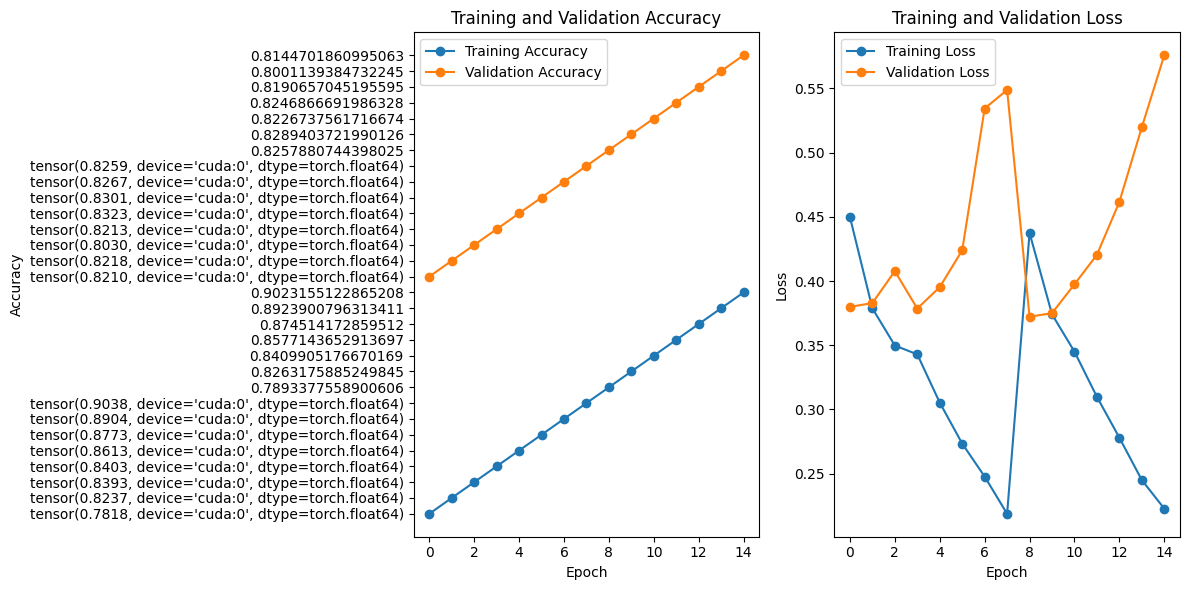

In [9]:
hlp.plot_history(history)

In [10]:
test_data_loader = hlp.create_data_loader(test_texts, test_labels, tokenizer, MAX_LEN, BATCH_SIZE)

test_acc, test_loss, test_label_actual, test_label_pred = hlp.eval_model(model, test_data_loader, device)

print(f'Test Accuracy: {test_acc} Test Loss: {test_loss}')

Test Accuracy: 0.8082415495632359 Test Loss: 0.6026748628219933


Classification Report:
              precision    recall  f1-score   support

    Non-Hate       0.82      0.86      0.84     15227
        Hate       0.80      0.73      0.76     11103

    accuracy                           0.81     26330
   macro avg       0.81      0.80      0.80     26330
weighted avg       0.81      0.81      0.81     26330



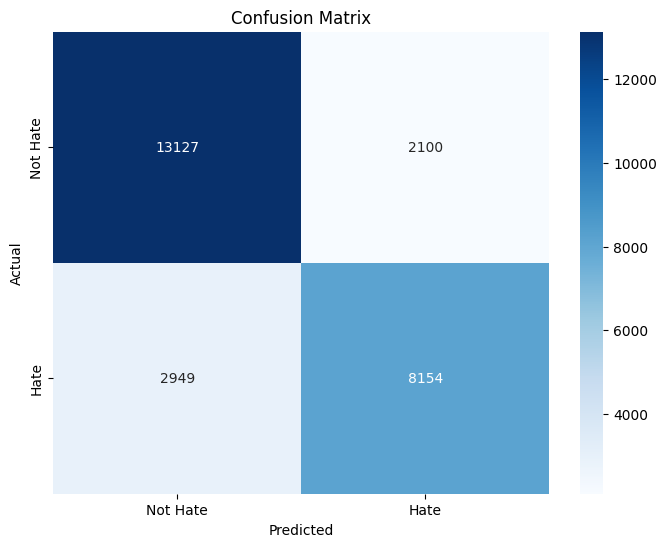

In [11]:
hlp.plot_confusion_matrix(test_label_actual, test_label_pred, ['Non-Hate', 'Hate'])

In [12]:
test_texts = ["This is the sort of thing that happens in a shithole country. @URL"]
preds, confidence = hlp.predict(test_texts, model, tokenizer, MAX_LEN, device)

if preds[0] == 1:
    print(f'Predicted class: Hate Speech \nConfidence: {confidence[0][1]:.2f}')
else:
    print(f'Predicted class: Not Hate Speech \nConfidence: {confidence[0][0]:.2f}')

Predicted class: Hate Speech 
Confidence: 0.74
